In [1]:
import os
from os import path
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt

In [2]:
ecg = pd.read_csv("./data/Monthly beer production in Australia megalitres Includes ale and stout.csv",index_col=0)

df = ecg.copy()

In [3]:
df.head()

,x
1,93.2
2,96.0
3,95.2
4,77.1
5,70.9


<Axes: >

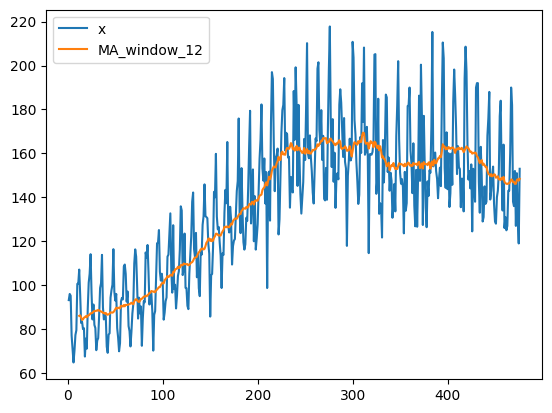

In [4]:
df["MA_window_12"] = df["x"].rolling(window=12).mean()
df.plot()

In [5]:
from statsmodels.tsa.arima.model import ARIMA

In [6]:
size = int(len(df)*0.8)
X = df["x"].values
train, test = X[:size], X[size+1:]

In [8]:
%%capture
history = [x for x in train]
arma_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(12,0,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [9]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [13]:
predict = arma_predictions

print("RMSE:", np.sqrt(mean_squared_error(test, predict)))
print("MAPE:", mean_absolute_percentage_error(test, predict))
print("MAE:", mean_absolute_error(test, predict))
print("R2: ", r2_score(test, predict))

RMSE: 12.963369201907387
MAPE: 0.06166938280439509
MAE: 9.597439667711933
R2:  0.6528444111175324


In [19]:
%%capture
history = [x for x in train]
arima_predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(12,3,3))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arima_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [20]:
predict = arima_predictions

print("RMSE:", np.sqrt(mean_squared_error(test, predict)))
print("MAPE:", mean_absolute_percentage_error(test, predict))
print("MAE:", mean_absolute_error(test, predict))
print("R2: ", r2_score(test, predict))

RMSE: 14.147071362208887
MAPE: 0.06870231615223743
MAE: 10.706443611907645
R2:  0.5865514532790881


In [21]:
o_df = ecg.copy()

o_df["x"][50:70] = np.nan

<Axes: >

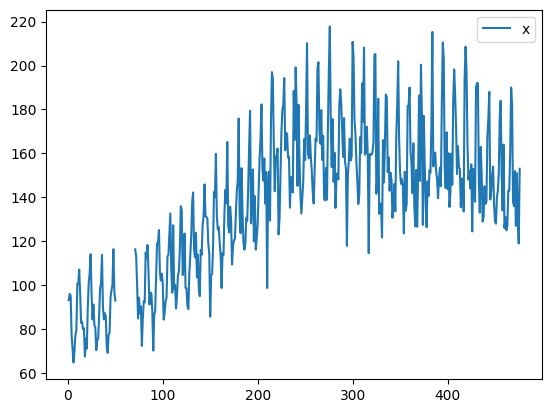

In [22]:
o_df.plot()

<Axes: >

<Figure size 2000x900 with 0 Axes>

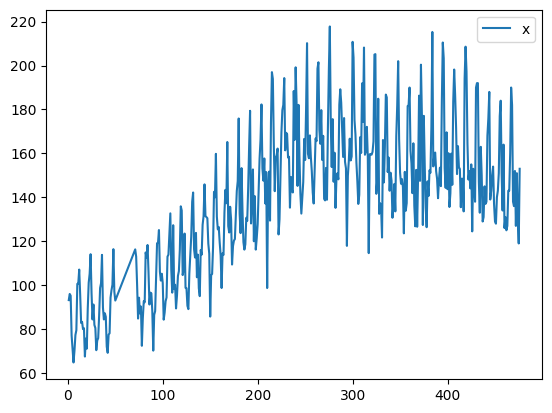

In [23]:
lin_df = o_df.interpolate(method="linear")

plt.figure(figsize=(20,9))
lin_df.plot()

<Axes: >

<Figure size 2000x900 with 0 Axes>

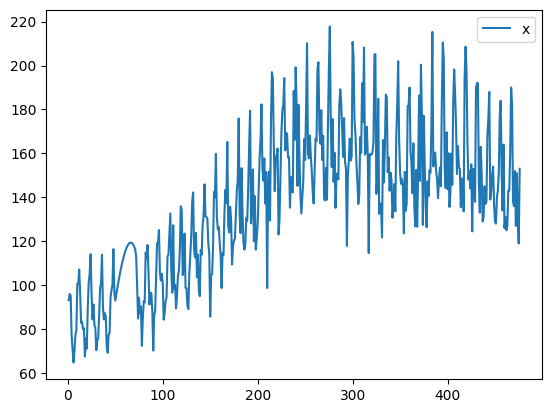

In [24]:
cubic_df = o_df.interpolate(method="cubic")

plt.figure(figsize=(20,9))
cubic_df.plot()

<Axes: >

<Figure size 2000x900 with 0 Axes>

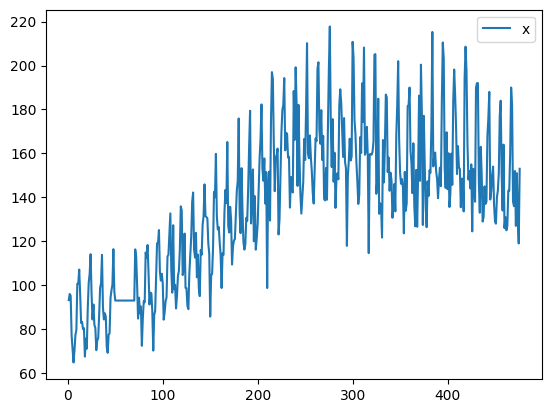

In [33]:
zero_df = o_df.interpolate(method="zero")

plt.figure(figsize=(20,9))
zero_df.plot()

In [34]:
from sklearn import preprocessing
from sklearn import svm

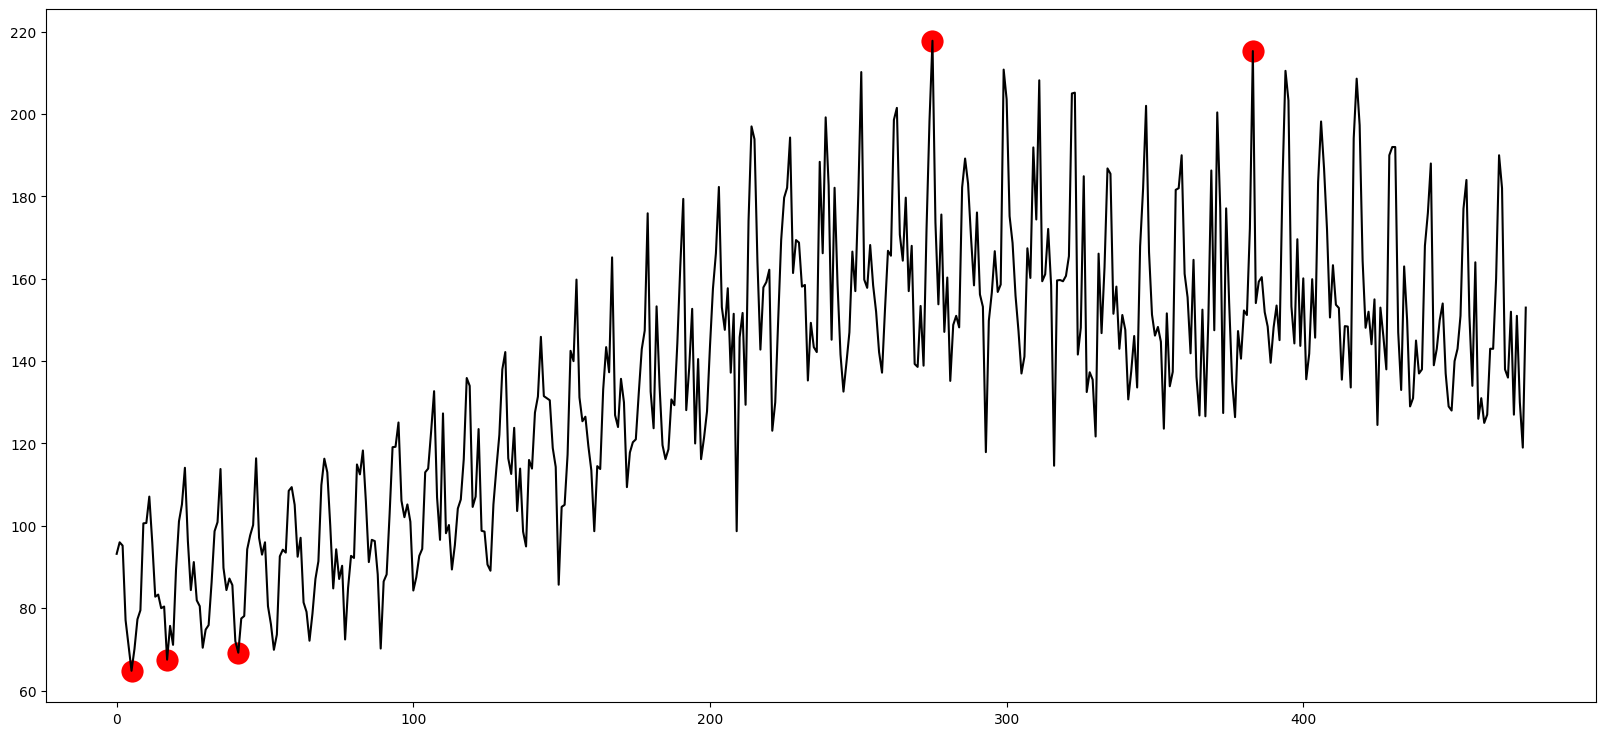

In [35]:
scaler = preprocessing.StandardScaler()
prec = 0.01

local_df = ecg["x"]

ts_scaled = scaler.fit_transform(local_df.values.reshape(-1,1))
model = svm.OneClassSVM(nu=prec,kernel="rbf",gamma=0.01)
model.fit(ts_scaled)

dtf_outliers = local_df.to_frame(name="ts")
dtf_outliers["index"] = range(len(local_df))
dtf_outliers["outlier"] = model.predict(ts_scaled)
dtf_outliers["outlier"] = dtf_outliers["outlier"].apply(lambda x: 1 if x ==-1 else 0)


fig, ax = plt.subplots(figsize=(20,9))
ax.plot(dtf_outliers["index"],dtf_outliers["ts"], color="black")
ax.scatter(x=dtf_outliers[dtf_outliers["outlier"]==1]["index"],y=dtf_outliers[dtf_outliers["outlier"]==1]["ts"], color="red", linewidths=10)


In [36]:
dtf_outliers.head()

,ts,index,outlier
1,93.2,0,0
2,96.0,1,0
3,95.2,2,0
4,77.1,3,0
5,70.9,4,0


In [37]:
dtf_outliers_nan = dtf_outliers.apply(lambda x: [None,x[1],x[2]] if x[2] == 1 else x , axis = 1)

C:\Users\maga-\AppData\Local\Temp\ipykernel_8552\458178092.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf_outliers_nan = dtf_outliers.apply(lambda x: [None,x[1],x[2]] if x[2] == 1 else x , axis = 1)


<Axes: >

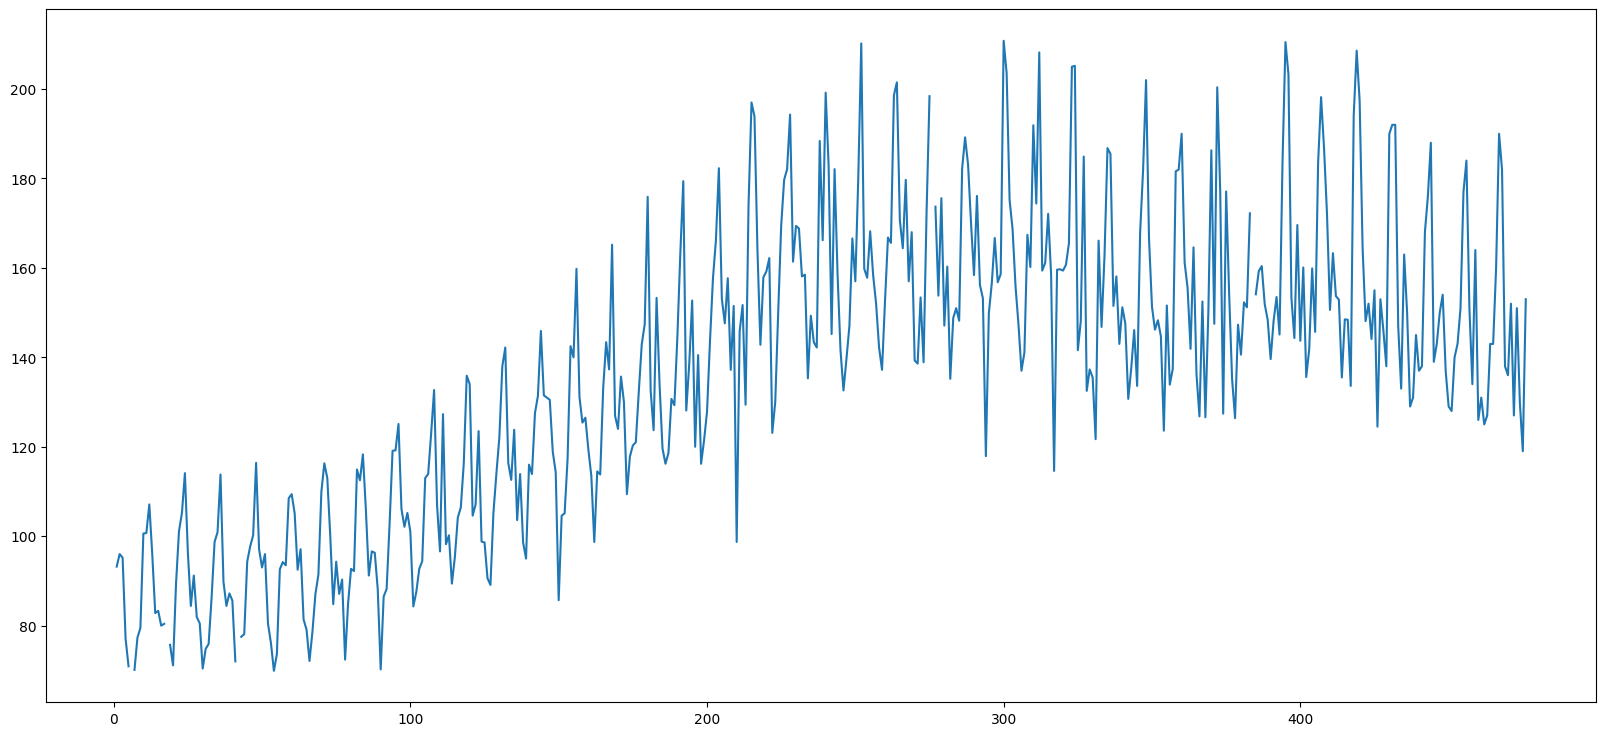

In [38]:
plt.figure(figsize=(20,9))
dtf_outliers_nan["ts"].plot()

<Axes: >

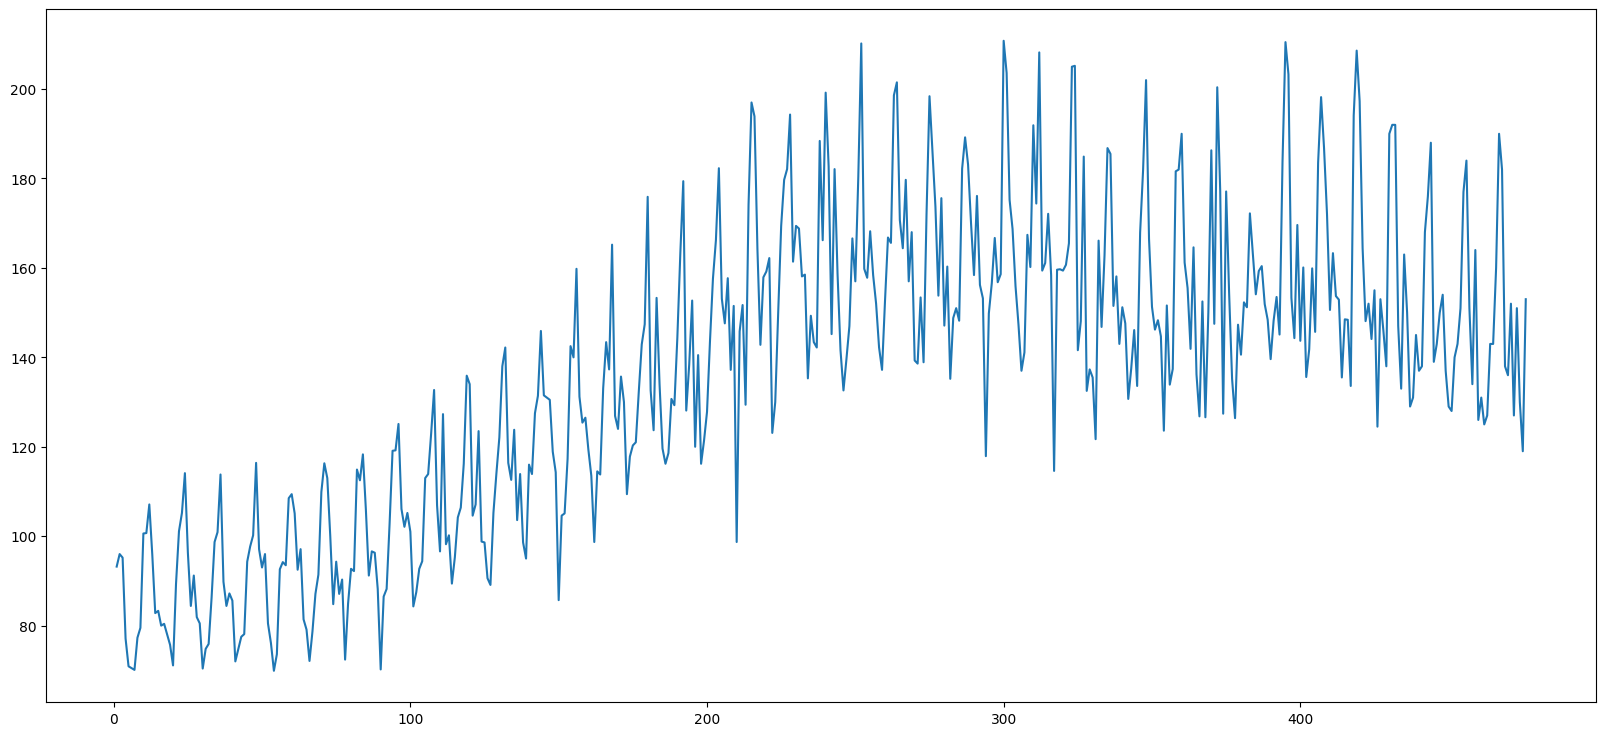

In [39]:
dtf_outliers_linear = dtf_outliers_nan.interpolate(method="linear")

plt.figure(figsize=(20,9))
dtf_outliers_linear["ts"].plot()

<Axes: >

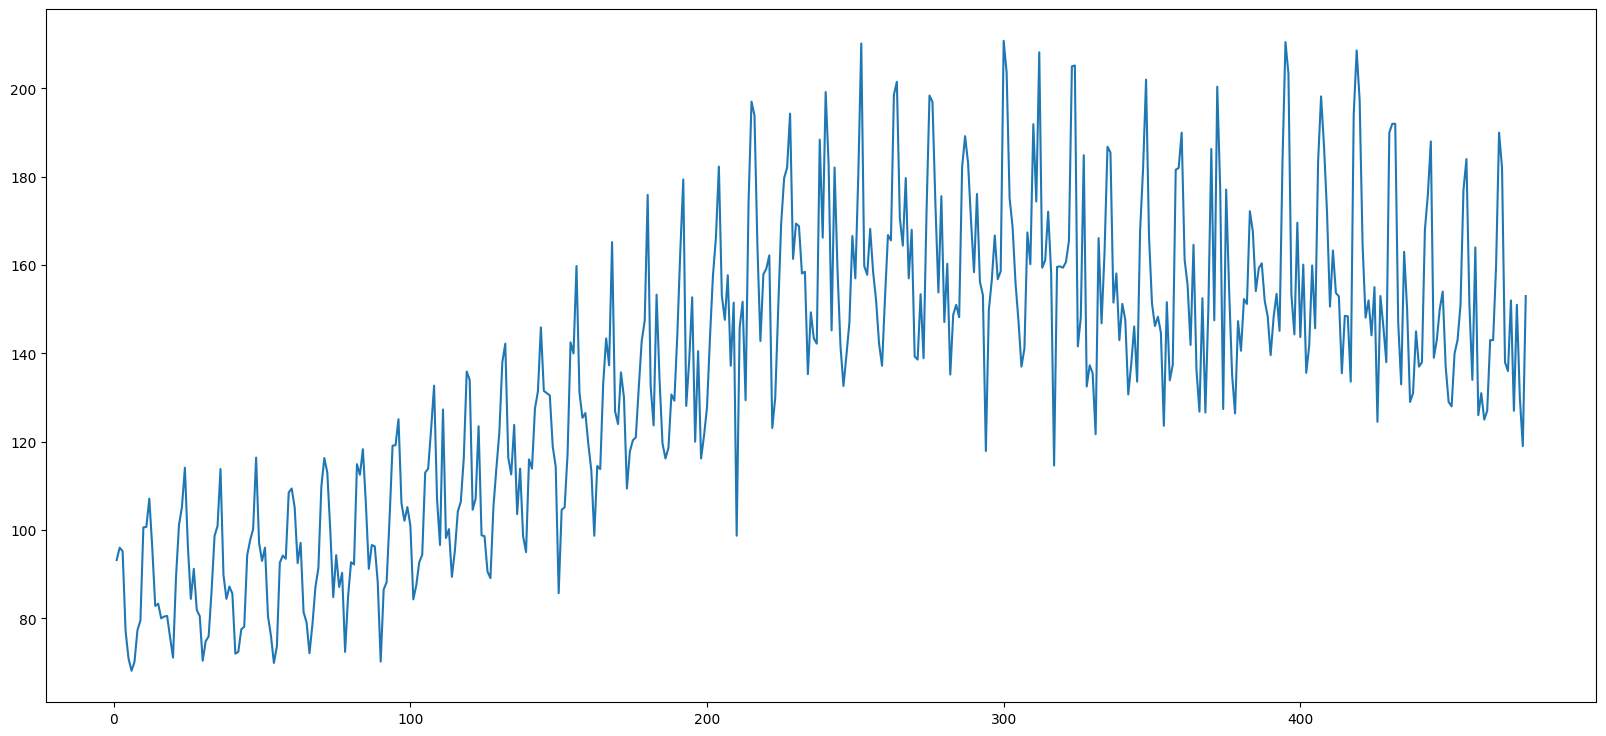

In [40]:
dtf_outliers_cubic = dtf_outliers_nan.interpolate(method="cubic")

plt.figure(figsize=(20,9))
dtf_outliers_cubic["ts"].plot()

<Axes: >

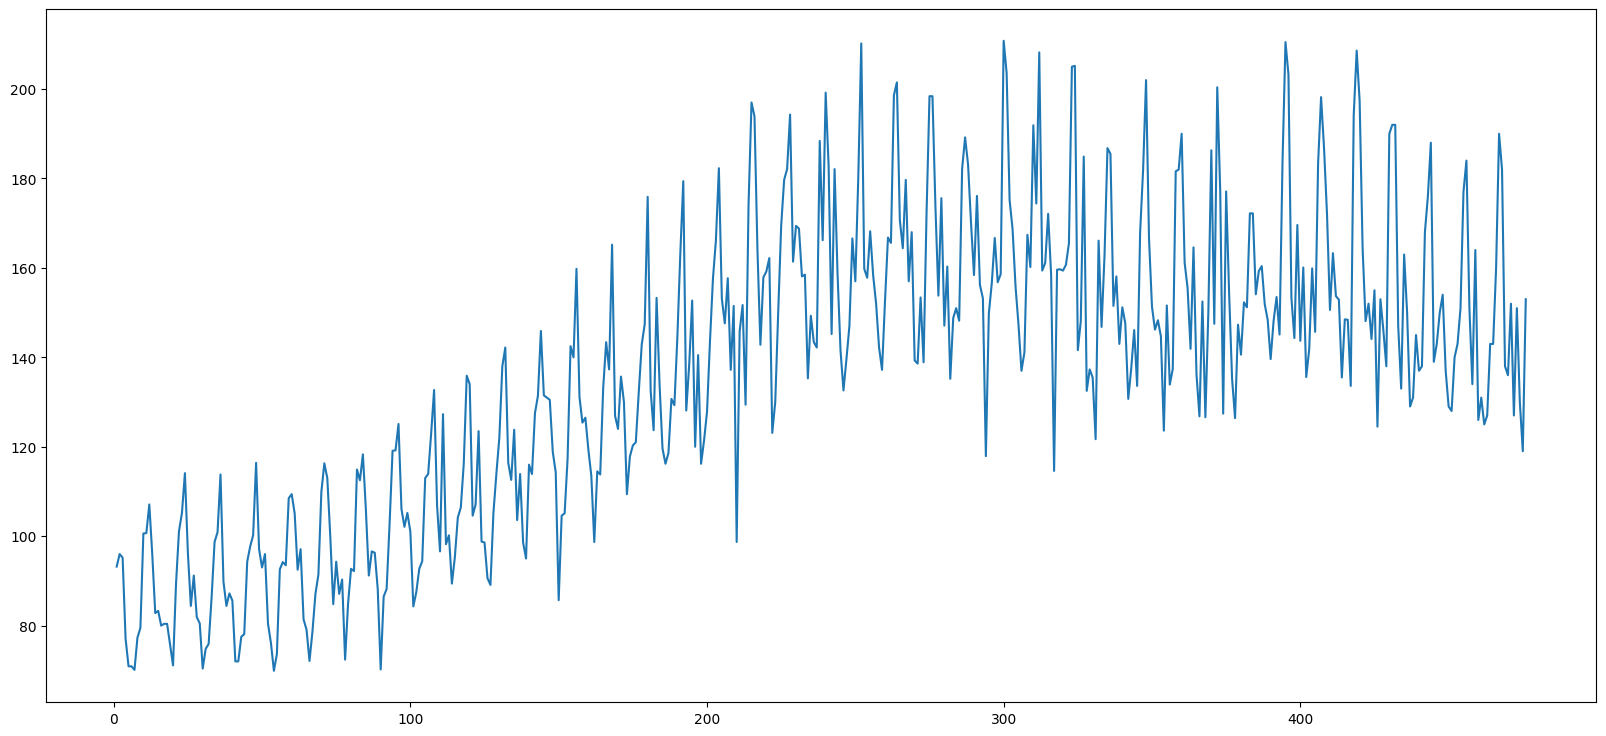

In [41]:
dtf_outliers_zero = dtf_outliers_nan.interpolate(method="zero")

plt.figure(figsize=(20,9))
dtf_outliers_zero["ts"].plot()